# Análise Exploratória de Dados

## Importando bibliotecas

In [95]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
import seaborn as sns

## Leitura do df

In [125]:
# Criando df
df = pd.read_csv('..\..\data\prouni_2005_2019_tratado.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()
df

,ano,universidade,tipo_bolsa,modalidade_ensino,curso,turno,sexo_beneficiario,raca_beneficiario,pcd,regiao,sigla_uf,municipio,idade,dt_nascimento
0,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,enfermagem,Integral,F,Branca,False,SUL,RS,santo angelo,18.0,1987-02-17
1,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,servico social,Noturno,F,Parda,False,SUL,RS,frederico westphalen,19.0,1986-06-14
2,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,servico social,Noturno,F,Parda,False,SUL,RS,frederico westphalen,21.0,1984-06-03
3,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,ciencias da computacao,Noturno,M,Branca,False,SUL,RS,frederico westphalen,18.0,1987-10-19
4,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,ciencias da computacao,Noturno,M,Amarela,False,SUL,RS,frederico westphalen,18.0,1987-07-20


## Análises básicas

### Código do georeferenciamento

In [97]:
#shp_ibge = gpd.read_file('utils\BR_Setores_2021\BR_Setores_2021.shp')
#gpkg_ibge = 'utils\BR_Setores_2021\BR_Setores_2021.gpkg'
#shp_ibge.to_file(gpkg_ibge, driver='GPKG')

In [98]:
brasil = gpd.read_file('../../utils/BR_Setores_2021_gpkg/BR_Setores_2021.gpkg')
brasil.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9..."
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9..."
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9..."
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9..."
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9..."


In [99]:
relacao_estado = df.groupby('sigla_uf', as_index= False).agg(count = ('sigla_uf', 'count'))
relacao_estado.sort_values(by='count', inplace = True)
relacao_estado.head()

,sigla_uf,count
6,DESCONHECIDO,402
22,RR,5553
3,AP,9561
0,AC,11292
27,TO,14416


In [100]:
df_new = brasil.merge(relacao_estado, left_on='SIGLA_UF', right_on='sigla_uf')

print(f'type: {type(df_new)}')
df_new.head()

type: <class 'geopandas.geodataframe.GeoDataFrame'>


,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry,sigla_uf,count
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9...",RO,31138
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9...",RO,31138
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9...",RO,31138
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9...",RO,31138
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9...",RO,31138


In [101]:
colors = ['#FFFF99', '#009900', '#003366']
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=20)

### Contagem de bolsas por Estado de 2005 a 2019

In [102]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

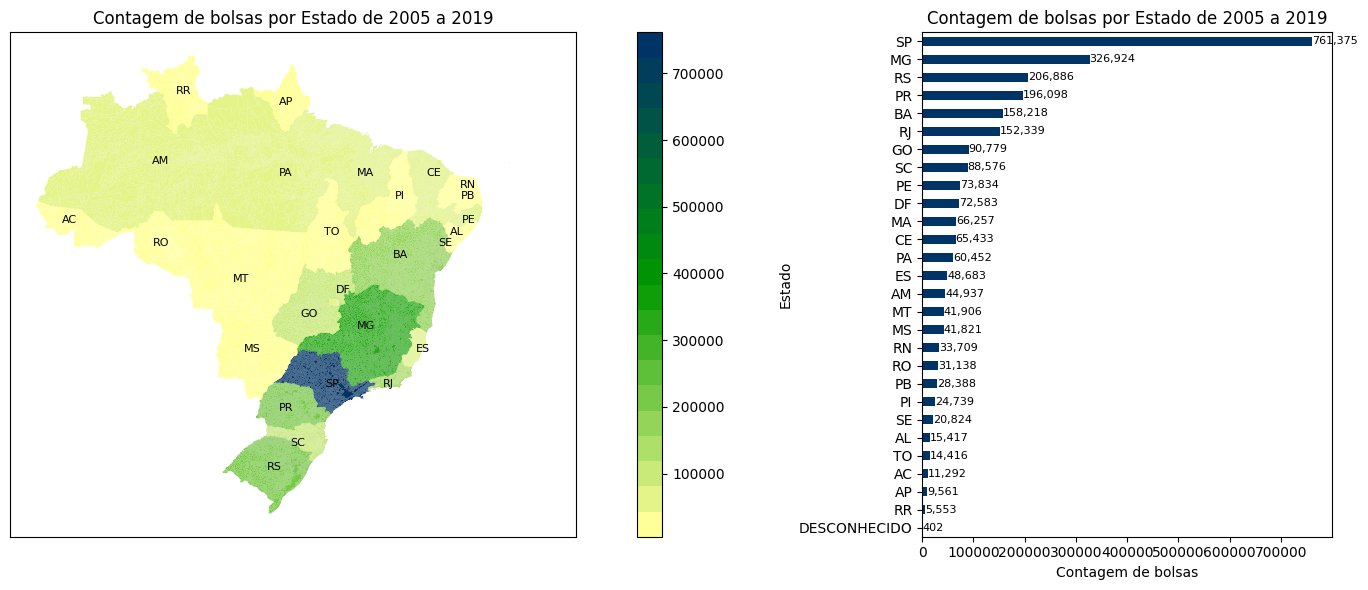

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = df_new.plot(column='count',  cmap=cmap, legend=True, ax=axes[0])
ax1.set_title('Contagem de bolsas por Estado de 2005 a 2019')
state_coordinates = {'AC': (-71, -9),'AL': (-37, -10),'AP': (-52, 1),'AM': (-63, -4),'BA': (-42, -12),'CE': (-39, -5),'DF': (-47, -15),'ES': (-40, -20),'GO': (-50, -17),'MA': (-45, -5),'MT': (-56, -14),'MS': (-55, -20),'MG': (-45, -18),'PA': (-52, -5),'PB': (-36, -7),'PR': (-52, -25),'PE': (-36, -9),'PI': (-42, -7),'RJ': (-43, -23),'RN': (-36, -6),'RS': (-53, -30),'RO': (-63, -11),'RR': (-61, 2),'SC': (-51, -28),'SP': (-48, -23),'SE': (-38, -11),'TO': (-48, -10)}

for state, (x, y) in state_coordinates.items():
    ax1.annotate(state, xy=(x, y), xytext=(0, 0), textcoords="offset points",
                 ha='center', fontsize=8, color='black')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = relacao_estado.plot.barh(x='sigla_uf', y='count',legend = False, ax=axes[1], color = '#003366')
ax2.set_xlabel('Contagem de bolsas')
ax2.set_ylabel('Estado')
ax2.set_title('Contagem de bolsas por Estado de 2005 a 2019')

# Adicionar os valores acima das barras
for idx, value in enumerate(relacao_estado['count']):
    ax2.text(value, idx, f'{value:,}', va='center', fontsize=8)


plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()

### Análise dos top 10 cursos com maior quantidade de bolsas

In [163]:
maiores_cursos = df['curso'].value_counts().head(10).index
df_top_cursos = df[df['curso'].isin(maiores_cursos)]

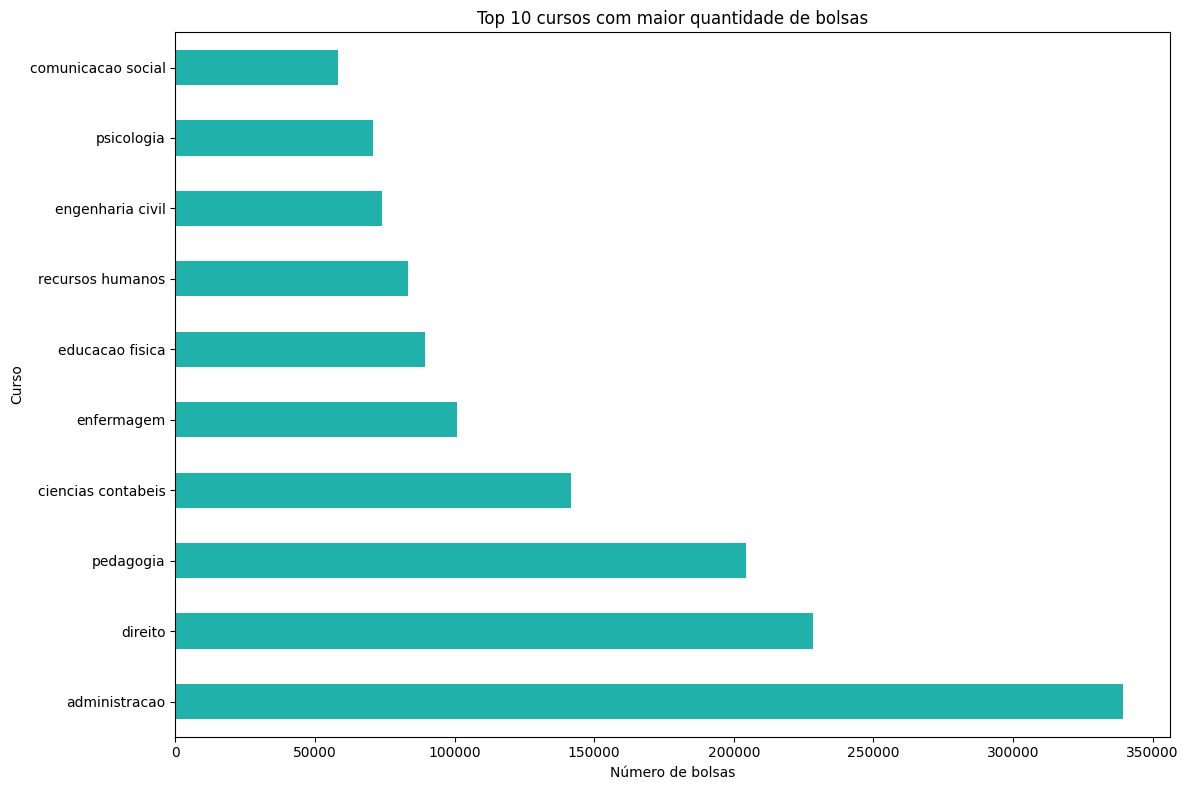

In [199]:
# Criar o gráfico
plt.figure(figsize=(12, 8))
df['curso'].value_counts().head(10).plot(kind='barh', color = 'lightseagreen')
plt.xlabel('Número de bolsas')
plt.ylabel('Curso')
plt.title('Top 10 cursos com maior quantidade de bolsas')

# Gerar informações sobre o gráfico
info_grafico = []
info_grafico.append('Análise do Gráfico:')
info_grafico.append('Tipo: Distribuição dos top 10 cursos com mais bolsas por curso')
info_grafico.append('---')

# Calcular informações estatísticas
curso_counts = df['curso'].value_counts().head(10)
total_bolsas = df['curso'].shape[0]
info_grafico.append(f'Total de bolsas: {total_bolsas}')

for curso, count in curso_counts.items():
    percentual = (count / total_bolsas) * 100
    info_grafico.append(f'Curso: {curso}')
    info_grafico.append(f'Número de bolsas: {count}')
    info_grafico.append(f'Percentual do total: {percentual:.2f}%')
    info_grafico.append('---')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [138]:
# Informações sobre o gráfico
for info in info_grafico:
    print(info)

Análise do Gráfico:
Tipo: Distribuição dos top 10 cursos com mais bolsas por curso
---
Total de bolsas: 2692540
Curso: administracao
Número de bolsas: 339251
Percentual do total: 12.60%
---
Curso: direito
Número de bolsas: 228468
Percentual do total: 8.49%
---
Curso: pedagogia
Número de bolsas: 204212
Percentual do total: 7.58%
---
Curso: ciencias contabeis
Número de bolsas: 141612
Percentual do total: 5.26%
---
Curso: enfermagem
Número de bolsas: 100711
Percentual do total: 3.74%
---
Curso: educacao fisica
Número de bolsas: 89356
Percentual do total: 3.32%
---
Curso: recursos humanos
Número de bolsas: 83309
Percentual do total: 3.09%
---
Curso: engenharia civil
Número de bolsas: 73977
Percentual do total: 2.75%
---
Curso: psicologia
Número de bolsas: 70942
Percentual do total: 2.63%
---
Curso: comunicacao social
Número de bolsas: 58404
Percentual do total: 2.17%
---


Ao examinarmos a distribuição dos cursos com a maior quantidade de bolsas entre os dez principais, podemos notar que esses cursos específicos desempenham um papel substancial na alocação de bolsas de estudo. Eles representam quase metade de todas as bolsas concedidas, totalizando 46.95% das 2,692,540 bolsas.

Se focarmos nos cinco cursos mais proeminentes em termos de quantidade de bolsas (Administração, Direito, Pedagogia, Ciências Contábeis e Enfermagem), observamos que eles compõem 37.85% do total de bolsas. Esses cursos podem ser considerados como opções populares e amplamente procuradas pelos beneficiários, possivelmente devido a oportunidades profissionais favoráveis e estabilidade em suas respectivas áreas.

Em contraste, cursos como Educação Física, Recursos Humanos, Engenharia Civil, Psicologia e Comunicação Social, embora representem uma parcela menor das bolsas, ainda desempenham um papel relevante, contribuindo com 8.10% do total. Essa diversificação nas escolhas de cursos sugere que os beneficiários têm uma ampla gama de interesses acadêmicos e profissionais.

### Análise da distribuição de gênero por curso nos top 10

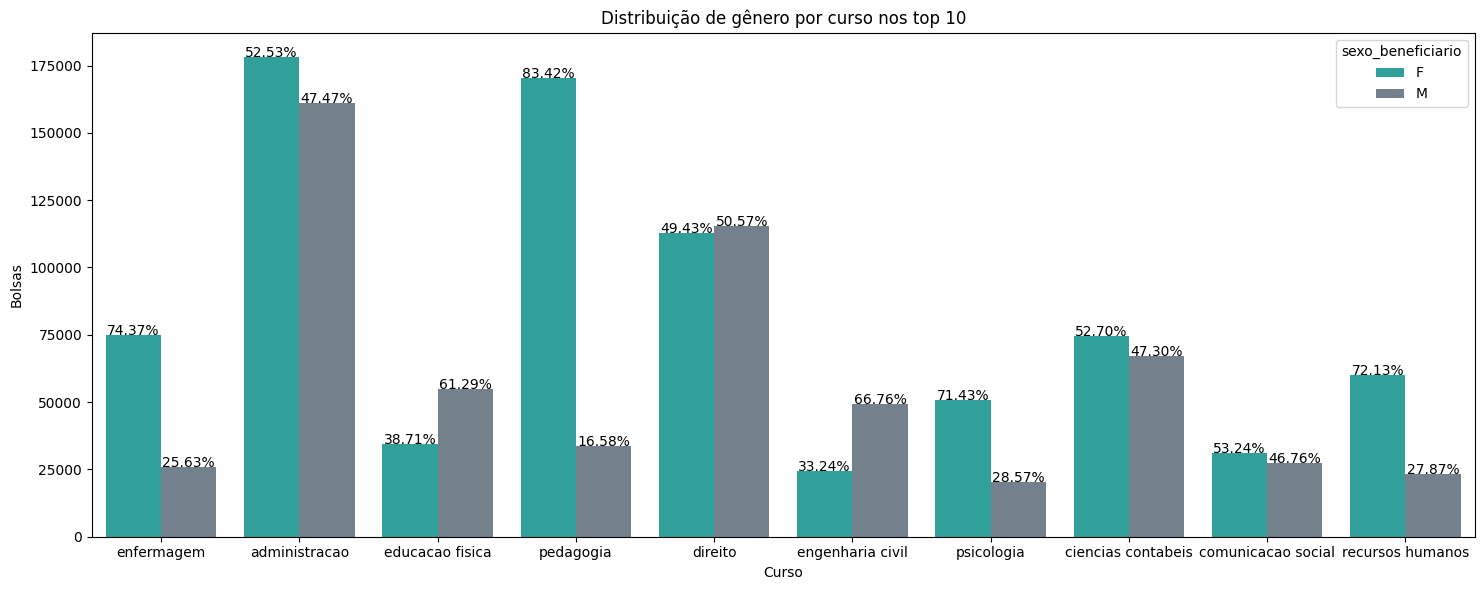

In [200]:
plt.figure(figsize=(15, 6))
maiores_cursos = df['curso'].value_counts().head(10).index
ax = sns.countplot(data=df_top_cursos, x='curso', hue='sexo_beneficiario', palette = ['lightseagreen', 'slategray'])
plt.xlabel('Curso')
plt.ylabel('Bolsas')
plt.title('Distribuição de gênero por curso nos top 10')

# Informações adicionais
info_grafico = []
info_grafico.append("Análise do Gráfico:")
info_grafico.append("Tipo: Distribuição de gênero por curso nos top 10")
info_grafico.append("---")
total_bolsas_top10 = df[df['curso'].isin(maiores_cursos)]['sexo_beneficiario'].count()
info_grafico.append(f"Total de bolsas nos top 10 cursos: {total_bolsas_top10}")
info_grafico.append("---")

# Loop para imprimir informações para cada curso
for curso in maiores_cursos:
    curso_df = df[(df['curso'] == curso) & (df['curso'].isin(maiores_cursos))]
    total_bolsas_curso = curso_df['sexo_beneficiario'].count()
    info_grafico.append(f"Curso: {curso}")
    info_grafico.append(f"Número de bolsas: {total_bolsas_curso}")
    
    # Distribuição por gênero
    genero_counts = curso_df['sexo_beneficiario'].value_counts()
    for genero, count in genero_counts.items():
        percentual = (count / total_bolsas_curso) * 100
        info_grafico.append(f"- {genero.capitalize()}: {count} ({percentual:.2f}%)")
    
    info_grafico.append("---")

plt.tight_layout()

for idx, p in enumerate(ax.patches):
    height = p.get_height()
    curso = ax.get_xticklabels()[idx -10].get_text()
    total = df_top_cursos[df_top_cursos['curso'] == curso].shape[0]
    percentual = height/total*100
    ax.annotate(f'{percentual:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.show()

In [188]:
# Informações dos gráficos
for info in info_grafico:
    print(info)

Análise do Gráfico:
Tipo: Distribuição de Gênero por Curso nos Top 10
---
Total de bolsas nos top 10 cursos: 1390242
---
Curso: administracao
Número de bolsas: 339251
- F: 178221 (52.53%)
- M: 161030 (47.47%)
---
Curso: direito
Número de bolsas: 228468
- M: 115547 (50.57%)
- F: 112921 (49.43%)
---
Curso: pedagogia
Número de bolsas: 204212
- F: 170356 (83.42%)
- M: 33856 (16.58%)
---
Curso: ciencias contabeis
Número de bolsas: 141612
- F: 74632 (52.70%)
- M: 66980 (47.30%)
---
Curso: enfermagem
Número de bolsas: 100711
- F: 74898 (74.37%)
- M: 25813 (25.63%)
---
Curso: educacao fisica
Número de bolsas: 89356
- M: 54764 (61.29%)
- F: 34592 (38.71%)
---
Curso: recursos humanos
Número de bolsas: 83309
- F: 60094 (72.13%)
- M: 23215 (27.87%)
---
Curso: engenharia civil
Número de bolsas: 73977
- M: 49390 (66.76%)
- F: 24587 (33.24%)
---
Curso: psicologia
Número de bolsas: 70942
- F: 50675 (71.43%)
- M: 20267 (28.57%)
---
Curso: comunicacao social
Número de bolsas: 58404
- F: 31092 (53.24%)
-

Nos cursos de "Administração", "Direito" e "Ciências Contábeis", a distribuição de gênero é relativamente equilibrada, com uma pequena variação em favor do gênero feminino. Essa observação sugere uma possível mudança gradual de paradigmas, indicando uma crescente igualdade de gênero em campos que tradicionalmente eram mais dominados por homens.

No entanto, quando observamos o curso de "Pedagogia", a tendência é marcante. A grande maioria das bolsas é destinada ao gênero feminino, representando 83.42% do total. Esse dado está diretamente alinhado com a realidade do cenário educacional, onde historicamente a presença feminina é predominante, refletindo a relação estreita entre a formação pedagógica e o papel tradicionalmente associado às mulheres na educação.

Ao analisar "Recursos Humanos" e "Psicologia", encontramos um padrão similar. Ambos os cursos também apresentam uma maioria de bolsas destinadas ao gênero feminino, com 72.13% e 71.43%, respectivamente. Essa tendência pode estar relacionada à percepção de habilidades interpessoais e empáticas como características femininas, as quais são essenciais nesses campos.

Em contraste, em "Enfermagem", a distribuição por gênero é especialmente acentuada, com 74.37% das bolsas destinadas às mulheres. Isso reflete a realidade da área da saúde, onde as mulheres historicamente têm desempenhado papéis de destaque, e a presença feminina é valorizada devido à natureza empática e cuidadora da profissão.

Por outro lado, nos cursos de "Engenharia Civil" e "Física", há uma predominância do gênero masculino, com 66.76% e 61.71% das bolsas, respectivamente. Esses números evidenciam uma disparidade de gênero persistente em campos da ciência, tecnologia, engenharia e matemática, ressaltando a necessidade contínua de incentivar a participação feminina nessas áreas.

### Análise da distribuição de faixa etária por curso nos top 10

In [127]:
# Calcular os quartis
Q1 = df['idade'].quantile(0.25)
Q3 = df['idade'].quantile(0.75)

# Calcular a amplitude interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f'Range sem outliers: {limite_inferior:.2f} e {limite_superior:.2f}')

Range sem outliers: 8.50 e 36.50


In [129]:
df_idade_regulada = df_top_cursos[(df_top_cursos['idade'] >= 15) & (df_top_cursos['idade'] <= 60)]

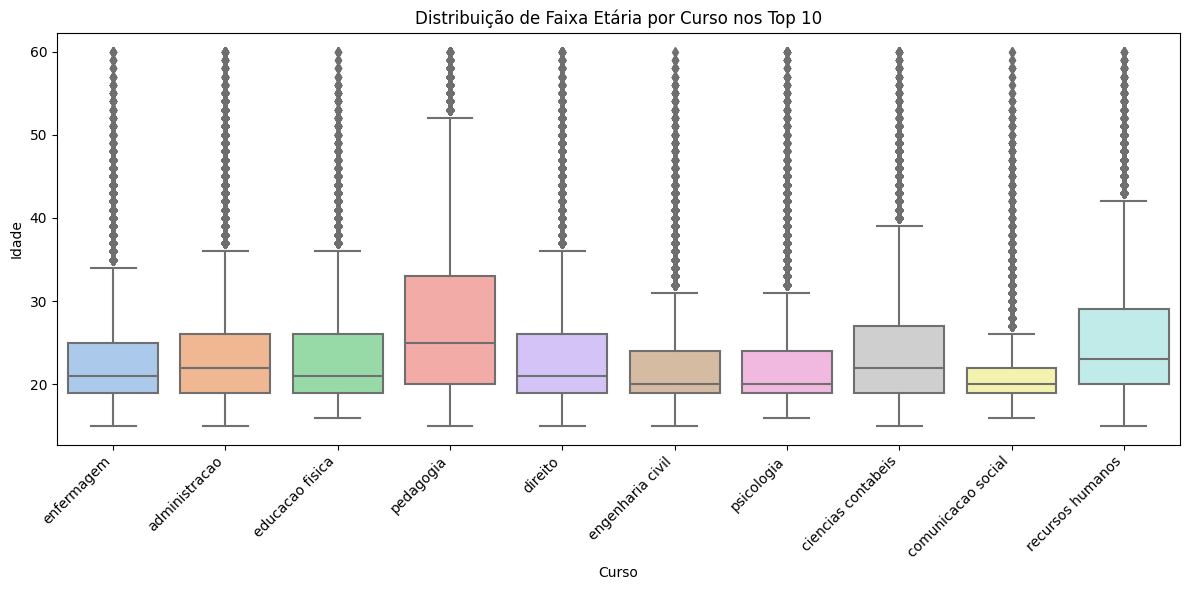

In [135]:
# Plotar o gráfico de box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_idade_regulada, x='curso', y='idade', palette = sns.color_palette("pastel", n_colors=10))
plt.xlabel('Curso')
plt.ylabel('Idade')
plt.title('Distribuição de faixa etária por curso nos top 10')
plt.xticks(rotation=45, ha='right')

# Informações adicionais
info_grafico = []
info_iniciais = []
info_iniciais.append("Análise do Gráfico:")
info_iniciais.append("Tipo: Distribuição de Gênero por Curso nos Top 10")
info_iniciais.append("---")

for curso in maiores_cursos:
    curso_df = df_idade_regulada[df_idade_regulada['curso'] == curso]
    idade_data = curso_df['idade']
    quartis = idade_data.quantile([0.25, 0.5, 0.75])
    media = idade_data.mean()
    iqr = quartis[0.75] - quartis[0.25]
    limite_inferior = quartis[0.25] - 1.5 * iqr
    limite_superior = quartis[0.75] + 1.5 * iqr
    outliers = idade_data[(idade_data < limite_inferior) | (idade_data > limite_superior)]
    
    info = {
        'curso': curso,
        'quartis': quartis,
        'media': media,
        'outliers': outliers.tolist()
    }
    info_grafico.append(info)


plt.tight_layout()
plt.show()

In [136]:
# Imprimir as informações
for info in info_iniciais:
    print(info)
    
for info in info_grafico:
    curso = info['curso']
    quartis = info['quartis']
    media = info['media']
    outliers = info['outliers']
    
    print(f"Curso: {curso}")
    print(f"Primeiro Quartil (Q1): {quartis[0.25]}")
    print(f"Mediana (Q2): {quartis[0.5]}")
    print(f"Terceiro Quartil (Q3): {quartis[0.75]}")
    print(f"Média: {media:.2f}")
    
    if len(outliers) > 0:
        print(f"Há {len(outliers)} outliers")
    else:
        print("Não há outliers")
        
    print("---")

Análise do Gráfico:
Tipo: Distribuição de Gênero por Curso nos Top 10
---
Curso: administracao
Primeiro Quartil (Q1): 19.0
Mediana (Q2): 22.0
Terceiro Quartil (Q3): 26.0
Média: 23.69
Há 16195 outliers
---
Curso: direito
Primeiro Quartil (Q1): 19.0
Mediana (Q2): 21.0
Terceiro Quartil (Q3): 26.0
Média: 23.37
Há 13303 outliers
---
Curso: pedagogia
Primeiro Quartil (Q1): 20.0
Mediana (Q2): 25.0
Terceiro Quartil (Q3): 33.0
Média: 27.36
Há 1853 outliers
---
Curso: ciencias contabeis
Primeiro Quartil (Q1): 19.0
Mediana (Q2): 22.0
Terceiro Quartil (Q3): 27.0
Média: 23.89
Há 4627 outliers
---
Curso: enfermagem
Primeiro Quartil (Q1): 19.0
Mediana (Q2): 21.0
Terceiro Quartil (Q3): 25.0
Média: 22.95
Há 6177 outliers
---
Curso: educacao fisica
Primeiro Quartil (Q1): 19.0
Mediana (Q2): 21.0
Terceiro Quartil (Q3): 26.0
Média: 23.30
Há 3590 outliers
---
Curso: recursos humanos
Primeiro Quartil (Q1): 20.0
Mediana (Q2): 23.0
Terceiro Quartil (Q3): 29.0
Média: 25.37
Há 3069 outliers
---
Curso: engenharia

É notável que cursos como Administração, Direito e Ciências Contábeis apresentam uma distribuição relativamente equilibrada de gênero, indicando uma participação ativa tanto de homens quanto de mulheres nessas áreas de estudo. Por outro lado, cursos como Enfermagem, Pedagogia, Recursos Humanos e Psicologia têm uma maioria feminina, sugerindo que essas áreas atraem predominantemente mulheres. Essa predominância feminina em cursos como Enfermagem, Pedagogia e Psicologia está em linha com padrões tradicionais de escolha de carreira, em que as mulheres muitas vezes optam por áreas ligadas ao cuidado, à educação e ao bem-estar. Essa tendência pode estar relacionada a valores culturais e expectativas sociais.

Por outro lado, cursos como Engenharia Civil e Educação Física, que têm uma predominância masculina, podem refletir estereótipos de gênero associados a áreas técnicas e físicas. Esses estereótipos podem influenciar as escolhas de carreira e a participação de gênero em diferentes campos.

Quando cruzamos esses dados com as informações sobre as médias de idade nos cursos, podemos notar que as escolhas de carreira e a distribuição de gênero nos cursos de ensino superior estão intrinsecamente ligadas a fatores sociais, culturais e estereótipos de gênero. Por exemplo, cursos como Pedagogia e Recursos Humanos têm médias de idade mais altas em comparação com outros cursos, o que pode sugerir que indivíduos nessas áreas tendem a buscar a educação superior após terem adquirido alguma experiência de trabalho ou responsabilidades familiares. Por outro lado, cursos como Engenharia Civil e Educação Física têm médias de idade mais baixas, indicando que os estudantes nesses cursos têm uma tendência a ingressar na educação superior mais cedo, possivelmente logo após o ensino médio.

### Análise de bolsas por curso

In [113]:
df.columns

Index(['ano', 'universidade', 'tipo_bolsa', 'modalidade_ensino', 'curso',
       'turno', 'sexo_beneficiario', 'raca_beneficiario', 'pcd', 'regiao',
       'sigla_uf', 'municipio', 'idade'],
      dtype='object')

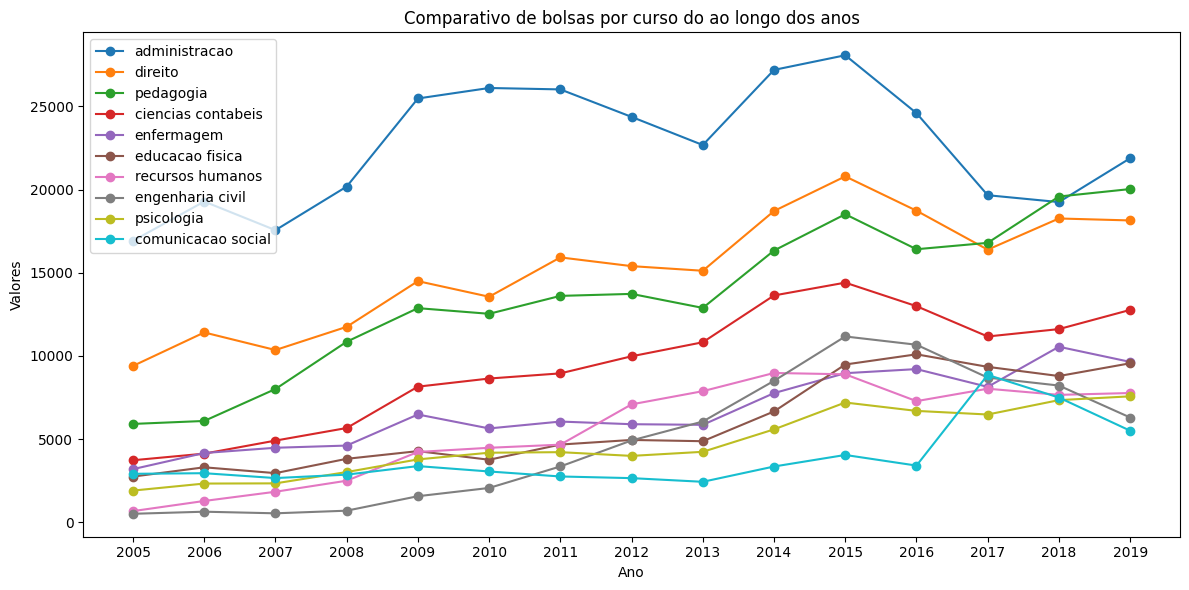

In [114]:
curso_bolsas = df.groupby('curso')['ano'].value_counts()
curso_bolsas_sorted = curso_bolsas.sort_index(level='ano')

cursos_comuns = df['curso'].value_counts().head(10).index

# Plot bolsas por curso ao longo dos anos
plt.figure(figsize=(12, 6))
for curso in cursos_comuns:
    plt.plot(curso_bolsas_sorted.loc[curso].index, curso_bolsas_sorted.loc[curso].values, marker='o', label=curso)

plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Comparativo de bolsas por curso do ao longo dos anos')
plt.xticks(curso_bolsas_sorted.loc[cursos_comuns[0]].index)
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

É notável que os cursos com a maior quantidade de bolsa com excessão do curso de administração, possuem um tendencia de crescimento

### Análise racial pelo maior grupo de bolsa

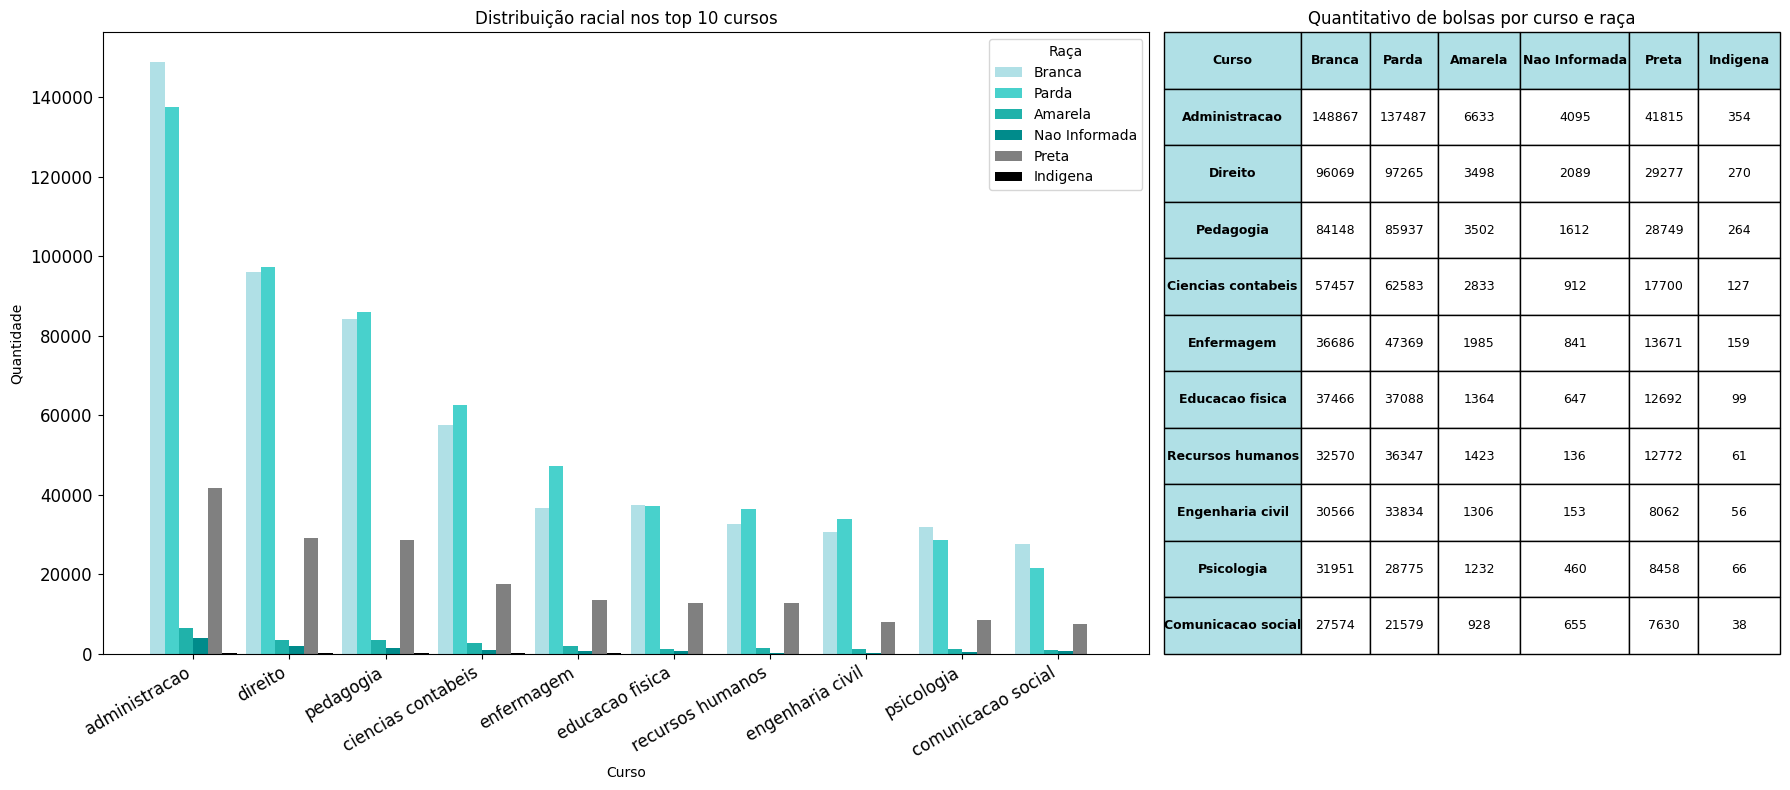

In [190]:
raca_labels = df['raca_beneficiario'].unique()
cores = ['powderblue', 'mediumturquoise', 'lightseagreen', 'darkcyan', 'Gray', 'black']

fig, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1.7, 1]})
bar_width = 0.15
index = np.arange(len(maiores_cursos))

for idx, raca in enumerate(raca_labels):
    raca_counts = []
    
    for curso in maiores_cursos:
        df_curso = df[df['curso'] == curso]
        raca_count = df_curso[df_curso['raca_beneficiario'] == raca].shape[0]
        raca_counts.append(raca_count)
    axs[0].bar(index + idx * bar_width, raca_counts, bar_width, label=raca, color=cores[idx])

axs[0].set_xlabel('Curso')
axs[0].set_ylabel('Quantidade')
axs[0].set_title('Distribuição racial nos top 10 cursos')
axs[0].set_xticks(index + bar_width * (len(raca_labels) - 1) / 2)
axs[0].set_xticklabels(maiores_cursos, rotation=30, ha='right')
axs[0].legend(title='Raça')
axs[0].tick_params(axis='both', which='major', labelsize=12)

table_data = []
for curso in maiores_cursos:
    table_row = [curso.capitalize()]
    for raca in raca_labels:
        raca_count = df[(df['curso'] == curso) & (df['raca_beneficiario'] == raca)].shape[0]
        table_row.append(raca_count)
    table_data.append(table_row)

col_labels = ['Curso'] + list(raca_labels)
axs[1].axis('tight')
axs[1].axis('off')
axs[1].set_title('Quantitativo de bolsas por curso e raça')
table = axs[1].table(cellText=table_data, colLabels=col_labels, cellLoc='center', colWidths=[0.5] + [0.25] * 2 + [0.3] + [0.4] + [0.25] + [0.3], bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.2)

for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('powderblue')
    elif key[1] == 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('powderblue')
    else:
        cell.set_text_props(weight='normal', color='black')
        cell.set_facecolor('w')

plt.tight_layout()
plt.show()


A análise da distribuição racial nos dez cursos mais populares revela algumas tendências importantes. A raça com a maior quantidade de beneficiários é a "Branca", seguida pela "Parda", indicando uma representação significativa dessas duas raças. Por outro lado, a presença da raça "Indígena" é bastante limitada, com um número muito menor de beneficiários. A raça "Amarela" e a categoria "Não Informada" também têm uma participação relativamente modesta.

Ao comparar a representação racial em cursos específicos, fica evidente que as raças "Branca" e "Parda" predominam em áreas como "Administração" e "Direito". No entanto, cursos como "Pedagogia", "Ciências Contábeis" e "Enfermagem" também apresentam uma presença considerável da raça "Parda".

Por outro lado, cursos como "Engenharia Civil" e "Comunicação Social" mostram uma representação mais dominante da raça "Branca", sugerindo uma disparidade racial nesses campos. Além disso, é notável que a raça "Indígena" tem uma presença mínima em todos os cursos, destacando a necessidade de promover a inclusão e a diversidade em todos os níveis educacionais.

Um padrão interessante que emerge dos dados é que a proporção entre as raças parece se manter relativamente consistente em todos os cursos, indicando que a disparidade racial é uma preocupação geral que se estende por várias áreas de estudo.

Em resumo, os insights extraídos da análise destacam a importância de criar um ambiente educacional inclusivo e diversificado, onde todas as raças tenham oportunidades iguais de acesso e participação. Isso pode ser alcançado através da implementação de medidas que visam a promoção da igualdade racial e a valorização da diversidade nas instituições de ensino.